In [5]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('../../Datasets/alzheimers_prediction_dataset.csv')
df.head()


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [8]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [10]:
df.describe

<bound method NDFrame.describe of             Country  Age  Gender  Education Level   BMI  \
0             Spain   90    Male                1  33.0   
1         Argentina   72    Male                7  29.9   
2      South Africa   86  Female               19  22.9   
3             China   53    Male               17  31.2   
4            Sweden   58  Female                3  30.0   
...             ...  ...     ...              ...   ...   
74278        Russia   60  Female                3  22.6   
74279            UK   58    Male               18  30.6   
74280         Spain   57  Female               13  28.2   
74281        Brazil   73  Female                7  29.0   
74282        Norway   57  Female                1  31.7   

      Physical Activity Level Smoking Status Alcohol Consumption Diabetes  \
0                      Medium          Never        Occasionally       No   
1                      Medium         Former               Never       No   
2                        H

In [15]:
df.shape

(74283, 25)

In [17]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [19]:
# Check data types of features
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
Categorical Columns: ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis']


In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [22]:
# Check data types of features
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['Country', 'Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Cognitive Test Score', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis']
Categorical Columns: []


In [25]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,0
1,0,72,1,7,29.9,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,0
2,14,86,0,19,22.9,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,53,1,17,31.2,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,0
4,17,58,0,3,30.0,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,0


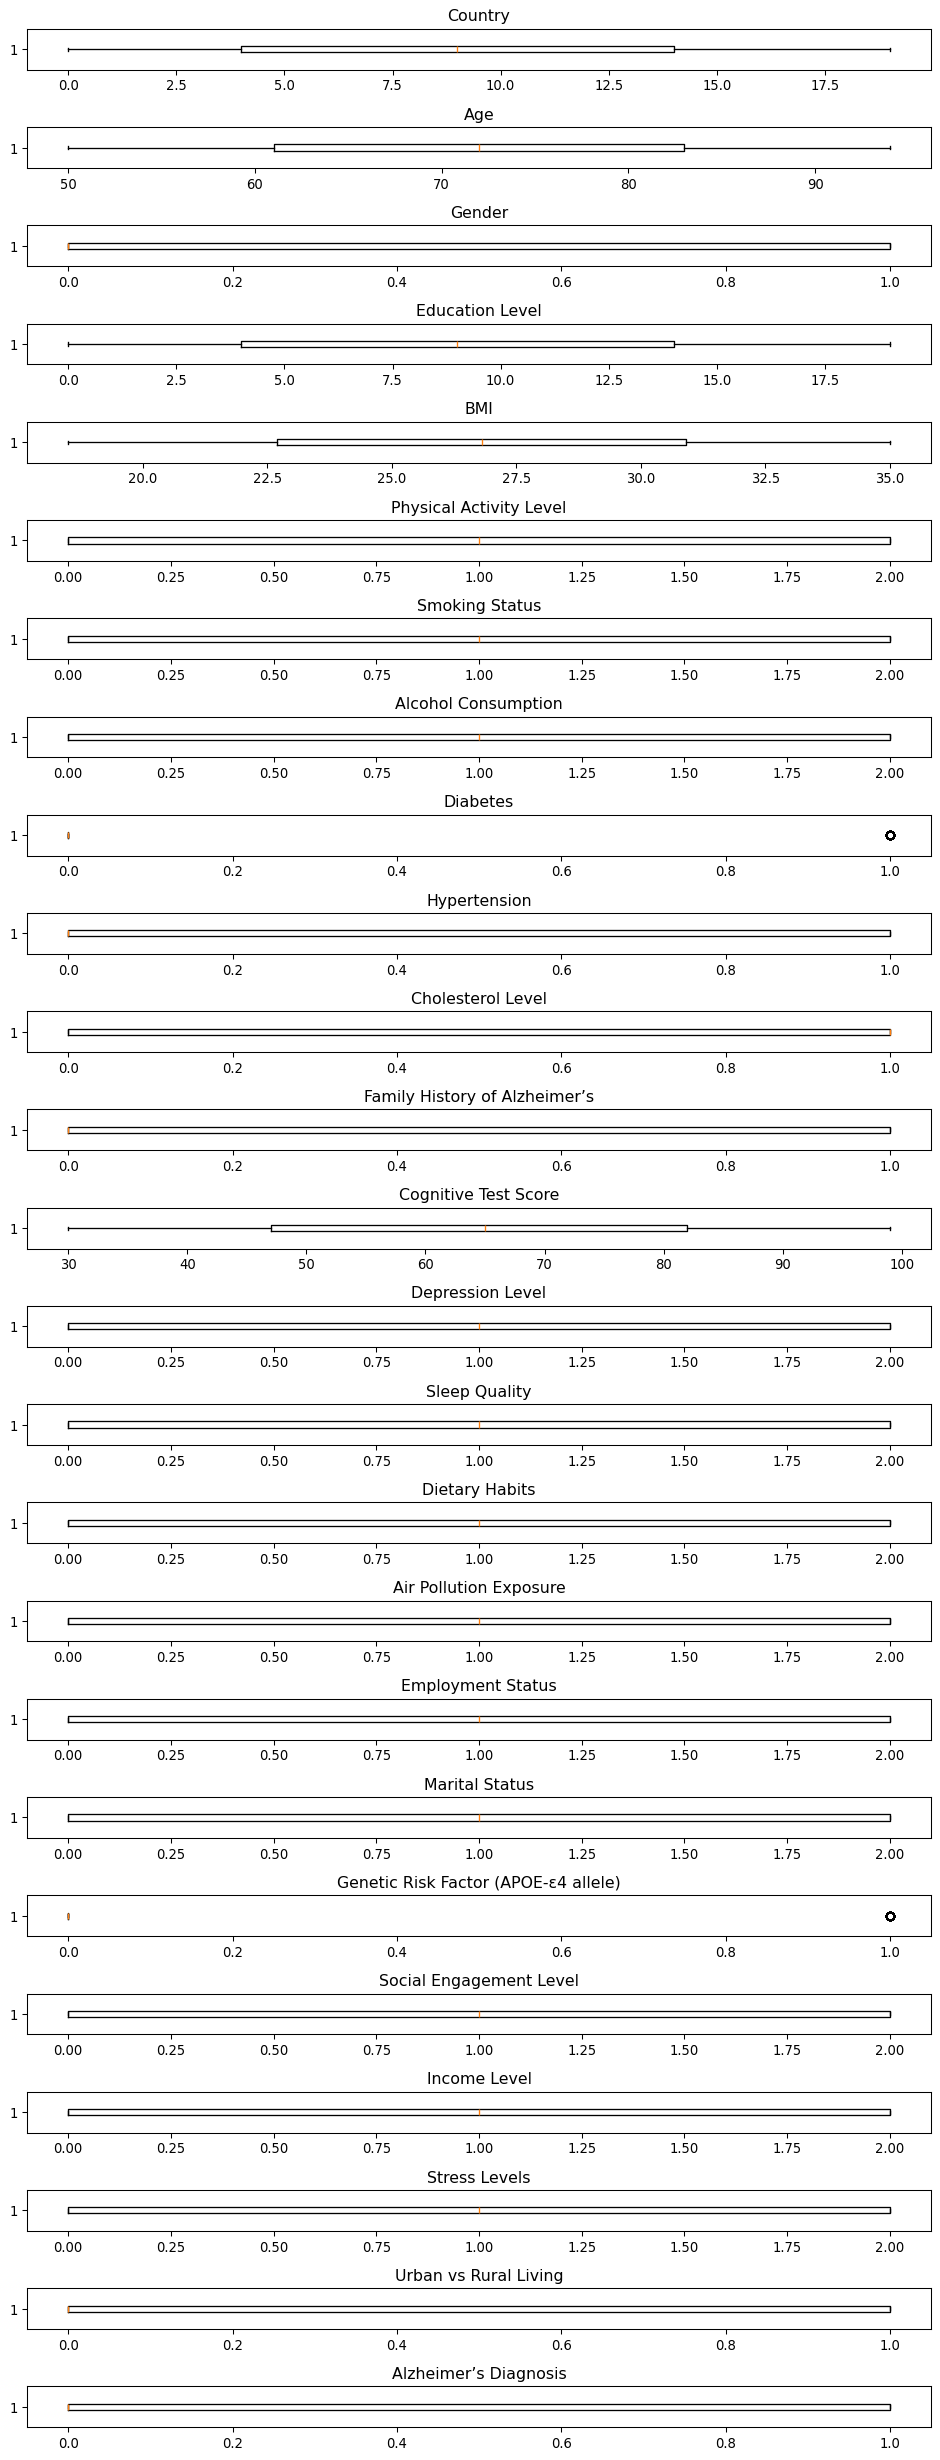

In [27]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Box Plots for numeric features
fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(10, 26))
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()


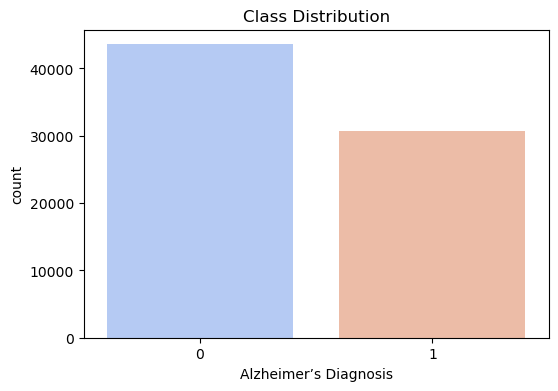

In [37]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Alzheimer’s Diagnosis', hue=target_col, palette='coolwarm', legend=False)
plt.title('Class Distribution')
plt.show()


<Figure size 1200x2000 with 0 Axes>

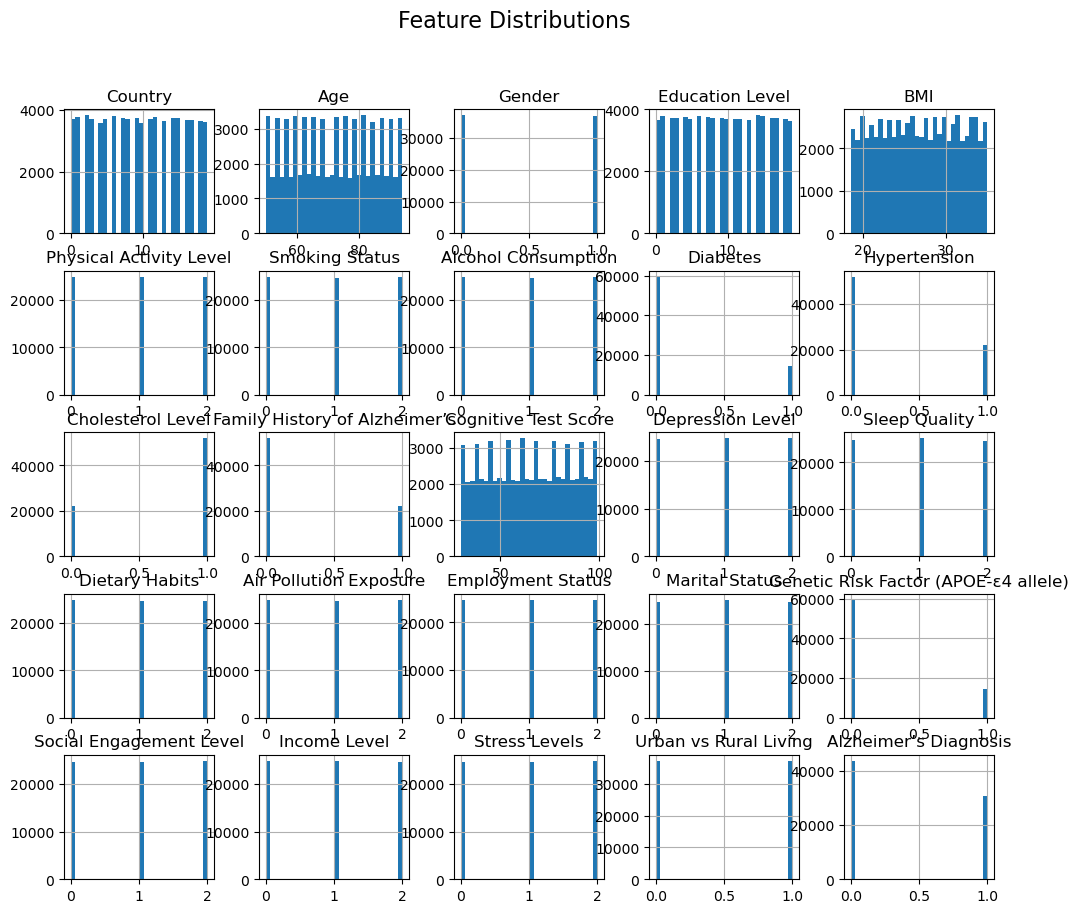

In [31]:
# Feature distributions
plt.figure(figsize=(12, 20))
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

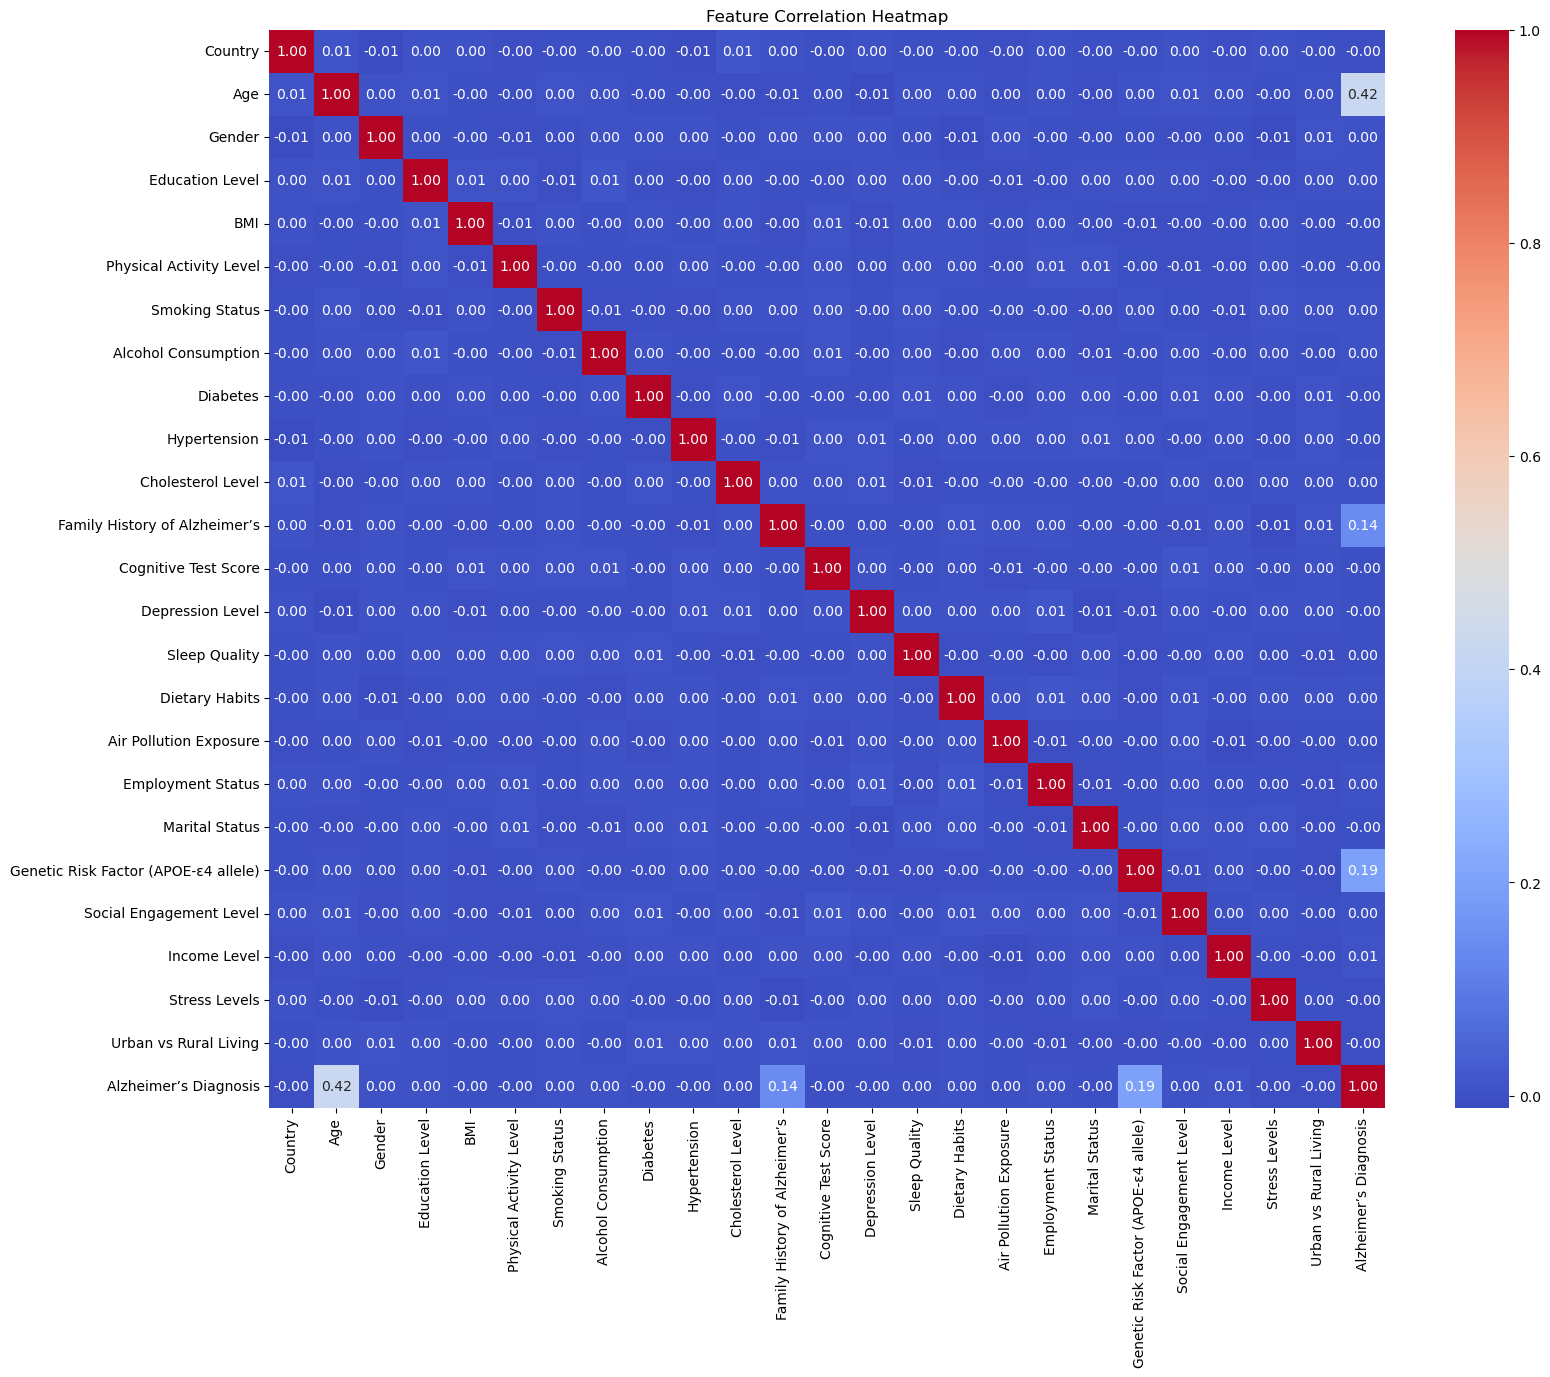

In [43]:
# Correlation heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Splitting data into train-test sets
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)